<a href="https://colab.research.google.com/github/Hoirotunnisa/UAS-AMS/blob/main/Visualisasi_dan_Insight_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Respons Masyarakat terhadap Kebijakan Gubernur Dedi Mulyadi dalam Penertiban Wisata Hibiscus Puncak: Studi Analisis Media Sosial**

---
**Latar belakang**

Wisata Hibiscus Puncak merupakan salah satu destinasi yang cukup ramai dikunjungi wisatawan di kawasan Puncak, Bogor. Namun, kebijakan penertiban oleh Gubernur Jawa Barat Dedi Mulyadi terhadap kawasan ini memicu perdebatan publik. Langkah tersebut dianggap sebagian pihak sebagai upaya penataan dan legalisasi lahan, tetapi juga menuai kritik karena dinilai merugikan pelaku usaha lokal dan masyarakat sekitar.

Media sosial menjadi ruang utama masyarakat untuk menyuarakan pendapat terkait kebijakan ini. Oleh karena itu, penting untuk memahami bagaimana respons masyarakat terbentuk dan tersebar secara daring. Penelitian ini bertujuan untuk menganalisis opini publik melalui analisis media sosial, guna menggambarkan persepsi masyarakat terhadap kebijakan tersebut.

**Mengapa Topik Ini Penting untuk Dianalisis**

Analisis terhadap respons masyarakat atas penertiban wisata Hibiscus Puncak penting dilakukan karena menyangkut tiga aspek utama:

- Kebijakan Publik dan Dampaknya pada Sektor Pariwisata
Penertiban destinasi wisata oleh pemerintah dapat berdampak langsung pada mata pencaharian masyarakat lokal, sektor ekonomi, dan persepsi publik terhadap tata kelola wilayah wisata.

- Persepsi Masyarakat dalam Era Digital
Di era media sosial, opini publik dapat terbentuk dan menyebar sangat cepat. Analisis respons masyarakat secara daring memberikan gambaran nyata tentang dukungan atau penolakan terhadap kebijakan pemerintah secara real-time.

- Masukan untuk Pemerintah Daerah
Hasil analisis ini dapat menjadi dasar evaluasi bagi pemerintah dalam merancang kebijakan yang lebih sensitif terhadap aspirasi masyarakat, terutama dalam konteks pengembangan dan penertiban destinasi wisata.

**Anggota Kelompok**

| Nama | NIM | Kelas | Kontribusi |
| -------- | -------- | -------- | -------- |
| Hoirotun Nisa'  | 11220940000003   |  B  | Scraping, Labeling, Preprocessing, Visualisasi, Edit PPT, Record Video, Upload Video. |
| Dina Sekar Juliati | 11210940000020 |   B | Scraping, Labeling, Preprocessing, Visualisasi, Edit PPT, Record Video, Edit Video.|

In [ ]:
!pip install bertopic

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from collections import Counter
from wordcloud import WordCloud

# Load Data

In [ ]:
df = pd.read_excel('/content/df_cleaned.xlsx')
df_brt = pd.read_excel('/content/df_brt.xlsx')
df.sample(10)

,label,date,time,uniqueId,input,likedByAuthor,full_text,cleaned_text
2928,1,07/05/2025,06:52:35,awiadjja,https://vt.tiktok.com/ZSBCtsQpF/,False,gk apa2 buang buat ganti rugi 40 milyar asalka...,milyar buang gk ganti hijau rugi
2341,2,21/05/2025,06:07:44,midah8135,https://vt.tiktok.com/ZSBCtsQpF/,False,"mantap, cocok itu oak, semangat",oak cocok semangat mantap
4254,2,08/03/2025,19:32:43,murrusannikko,https://www.tiktok.com/@afianrazi/video/747903...,False,wow what a beautiful place why distortion,why place distortion a beautiful what wow
2414,0,20/06/2025,15:52:53,westt276,https://vt.tiktok.com/ZSBCtsQpF/,False,era pemimpin yg Amanah tanpa mikirin untung rugi,yg mikirin untung era amanah pimpin rugi
1224,2,06/03/2025,10:46:21,fawwazjualan,https://vt.tiktok.com/ZSBCpDAL7/,False,udah di segel,segel udah
3633,0,10/05/2025,06:05:24,mulmulyati40,https://vt.tiktok.com/ZSBCtsQpF/,False,mantaaapp bapak aing,mantaaapp aing
1878,1,06/03/2025,08:14:27,ga_suga,https://vt.tiktok.com/ZSBCpDAL7/,False,bukti keserakahan manusia... apa aja d gusur y...,yg d cuan bukti aja gusur manusia serakah
917,2,07/03/2025,13:02:01,nurchasanati612,https://vt.tiktok.com/ZSBCpDAL7/,False,"hti""dgn lhn hijau bl sdh dialih fungsikn.ini s...",oknumttp htidgn fungsiknini hijauoksigen utama...
4022,0,10/03/2025,02:58:13,toyyib68,https://www.tiktok.com/@afianrazi/video/747903...,False,Bru nk pergi tgok dah kne toboh rupabya,kne rupabya tgok bru toboh pergi dah nk
1331,1,06/03/2025,10:03:50,user8032962605951,https://vt.tiktok.com/ZSBCpDAL7/,False,bner teu sakola mnehna mh teu pernh cicing d g...,mh pernh d gunung baheulana cicing bner teu mn...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          4924 non-null   int64 
 1   date           4924 non-null   object
 2   time           4924 non-null   object
 3   uniqueId       4924 non-null   object
 4   input          4924 non-null   object
 5   likedByAuthor  4924 non-null   bool  
 6   full_text      4924 non-null   object
 7   cleaned_text   4901 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 274.2+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


# Insight Mining

In [ ]:
df_WC = df[['label','cleaned_text']]
WC_positive = df_WC[df_WC['label'] == 1]
WC_negative = df_WC[df_WC['label'] == 0]

## Word cloud gabungan

In [ ]:
all_text_gab = ' '.join(word for word in df_WC['cleaned_text'].astype(str))

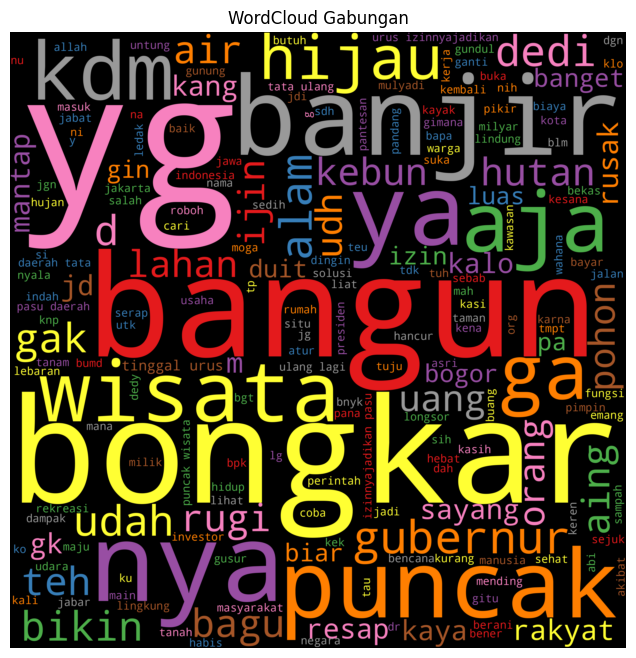

In [ ]:
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_gab)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Gabungan')
plt.margins(x=0, y=0)
plt.show()

Berdasarkan WordCloud Gabungan, respons masyarakat terhadap kebijakan Gubernur Dedi Mulyadi dalam penertiban wisata Hibiscus Puncak didominasi isu lingkungan, penataan kawasan, dan perizinan. Kata-kata seperti “bangun”, “bongkar”, “alam”, “air”, dan “tanah” menunjukkan perhatian pada kerusakan lingkungan akibat pembangunan liar. Nama “Dedi” dan “gubernur” menandakan figur kepemimpinan menjadi sorotan publik. Sentimen masyarakat terbagi antara yang mendukung pelestarian alam dan yang merasa dirugikan secara sosial-ekonomi. Hal ini menegaskan pentingnya kebijakan yang seimbang antara pelestarian lingkungan dan kepentingan warga.

## Word cloud positif

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
all_text_pos = ' '.join(word for word in WC_positive['cleaned_text'].astype(str))

# Tokenisasi teks
words_pos = all_text_pos.split()

# Hitung frekuensi kata
word_counts_pos = Counter(words_pos)

# Dapatkan 20 kata terbanyak
top_50_words_pos = word_counts_pos.most_common(50)

# Konversi daftar tuple (kata, frekuensi) menjadi dictionary
word_freq_pos = dict(top_50_words_pos)

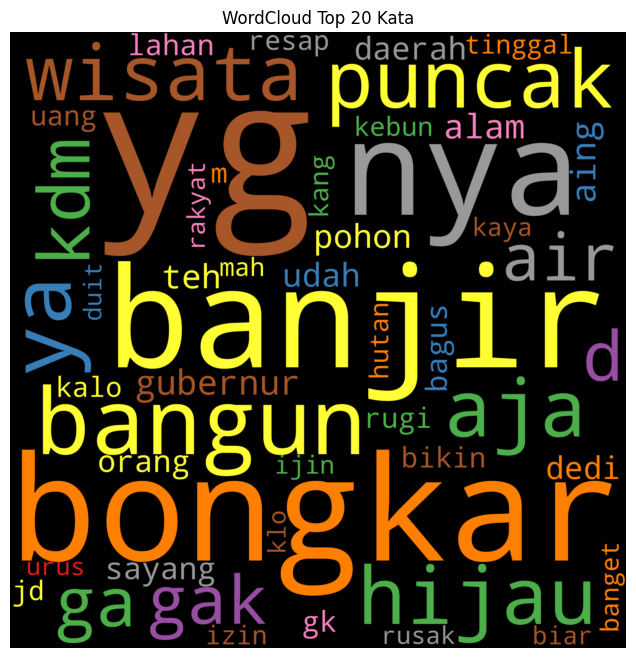

In [ ]:
# Buat objek WordCloud dengan parameter yang diinginkan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,
    relative_scaling=0.5,
    scale=3,
    # Perhatikan, kita tidak lagi membatasi max_words di sini
    # karena kita sudah memberikan 20 kata terbanyak
).generate_from_frequencies(word_freq_pos) # Menggunakan generate_from_frequencies

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Top 20 Kata')
plt.margins(x=0, y=0)
plt.show()

WordCloud ini menunjukkan bahwa respons masyarakat terhadap kebijakan Gubernur Dedi Mulyadi dalam penertiban Wisata Hibiscus Puncak didominasi oleh isu pembongkaran, legalitas pembangunan, dan dampak lingkungan. Kata-kata seperti “bongkar”, “tanah”, “bangun”, dan “izin” mencerminkan perhatian masyarakat terhadap konflik antara pembangunan dan penertiban, serta pertanyaan mengenai keabsahan perizinan. Selain itu, kata “alam”, “hutan”, dan “air” menunjukkan kekhawatiran akan kerusakan lingkungan, sementara kemunculan kata “gak” mengindikasikan penolakan atau kritik dari sebagian masyarakat. Nama “dedi” dan “gubernur” memperlihatkan bahwa kebijakan ini sangat melekat pada figur kepemimpinan, menjadikan Gubernur Dedi Mulyadi pusat perhatian dalam kontroversi tersebut.

## Word cloud negatif

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
all_text_neg = ' '.join(word for word in WC_negative['cleaned_text'].astype(str))

# Tokenisasi teks
words_neg = all_text_neg.split()

# Hitung frekuensi kata
word_counts_neg = Counter(words_neg)

# Dapatkan 20 kata terbanyak
top_50_words_neg = word_counts_neg.most_common(50)

# Konversi daftar tuple (kata, frekuensi) menjadi dictionary
word_freq_neg = dict(top_50_words_neg)

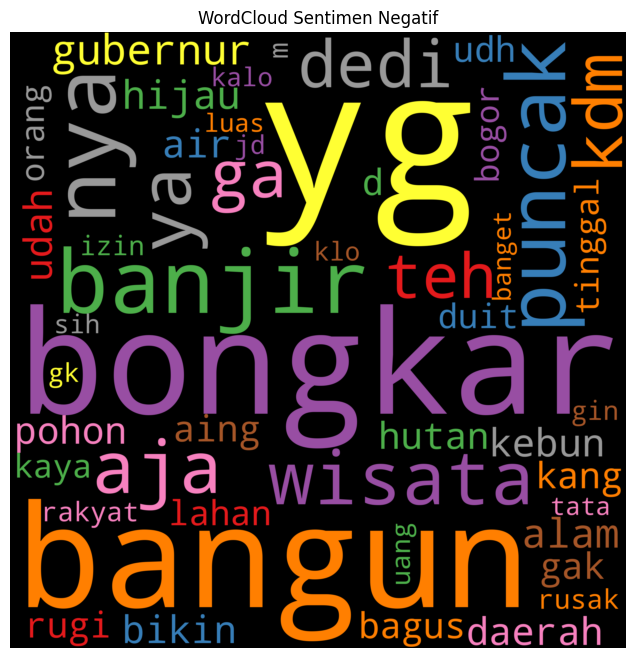

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate_from_frequencies(word_freq_neg)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

WordCloud sentimen negatif menunjukkan bahwa respons masyarakat yang bersifat kritis terhadap kebijakan penertiban Wisata Hibiscus Puncak umumnya terkait isu pembongkaran, perizinan, dan dampak terhadap masyarakat lokal. Kata-kata seperti “bongkar”, “gak”, “izin”, “ngerti”, “rumah”, “dagang”, “rakyat”, dan “ngapain” mengindikasikan adanya ketidakpuasan, kebingungan, hingga kekecewaan terhadap tindakan pemerintah yang dinilai merugikan warga, khususnya pedagang dan pemilik bangunan. Ungkapan-ungkapan tersebut menunjukkan bahwa sebagian masyarakat merasa tidak dilibatkan dalam proses kebijakan, atau tidak memahami urgensi tindakan tersebut, sehingga menimbulkan kesan sewenang-wenang dan tidak berpihak pada rakyat kecil. Sentimen negatif ini menyoroti perlunya pendekatan yang lebih komunikatif dan solutif dalam implementasi kebijakan publik.

# WordLink

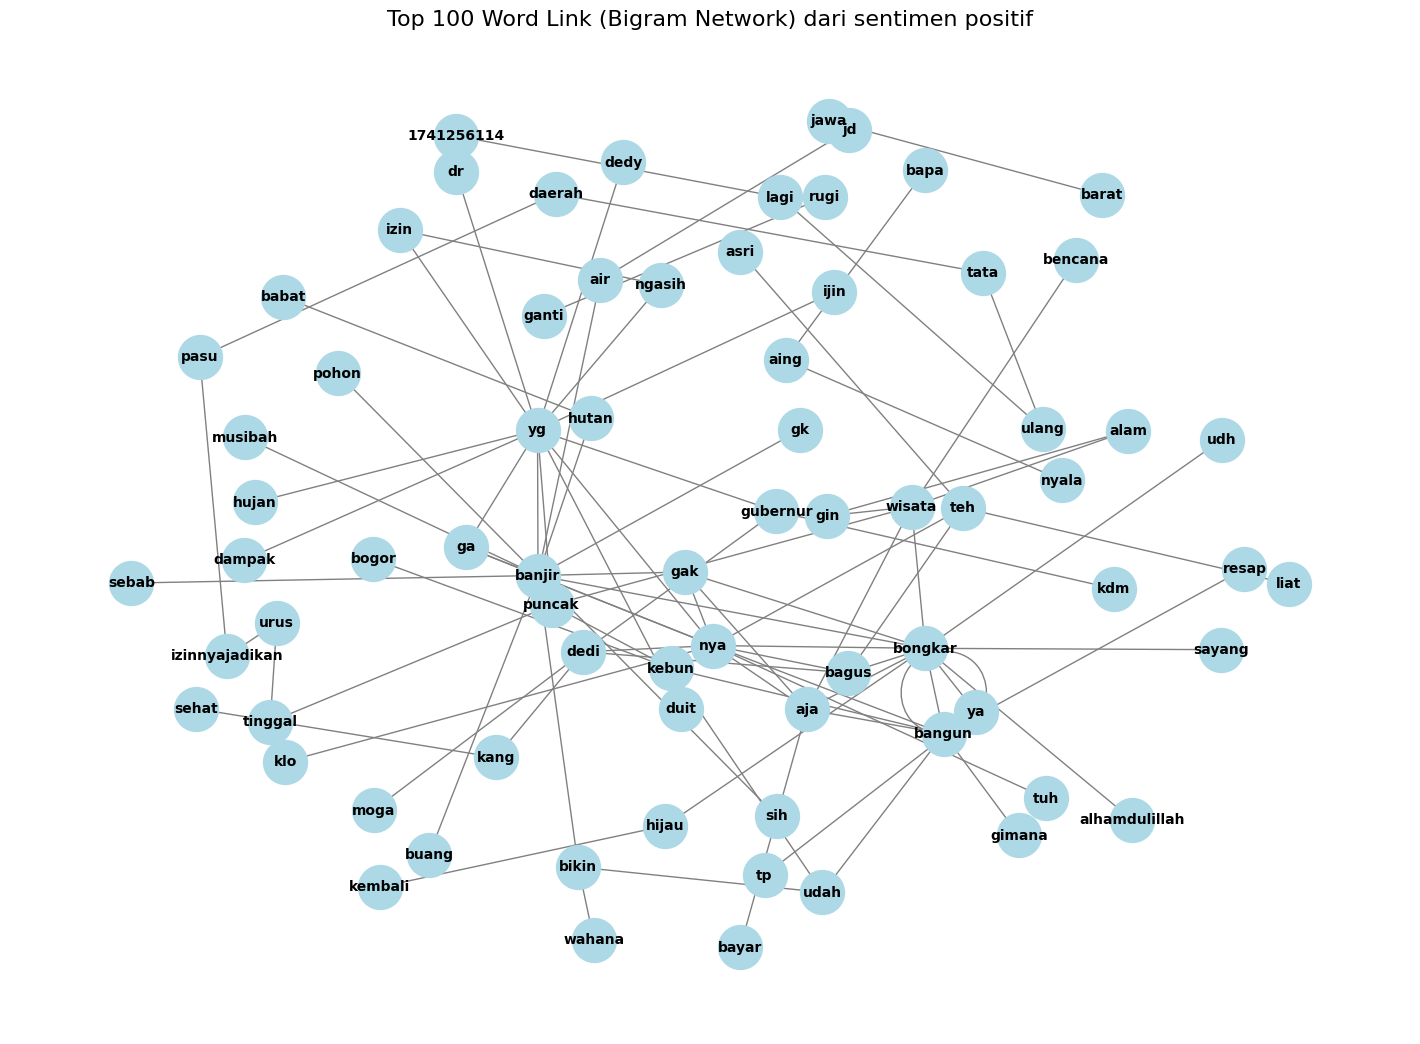

In [ ]:
# Ambil teks komentar dengan label i
komen = df['cleaned_text'].astype(str).tolist()

# Gunakan CountVectorizer untuk bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(komen)
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Gabungkan bigram dan frekuensinya
bigram_freq = list(zip(bigrams, counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Ambil 50 bigram teratas (ubah jumlah sesuai kebutuhan)
top_n = 100
top_bigrams = [b[0] for b in bigram_freq_sorted[:top_n]]
edges = [tuple(b.split()) for b in top_bigrams]

# Buat graph dari bigram
G3 = nx.Graph()
G3.add_edges_from(edges)

# Visualisasi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G3, k=0.6, seed=42)
nx.draw(
    G3, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title(f"Top {top_n} Word Link (Bigram Network) dari sentimen positif", fontsize=16)
plt.show()

WordLink Sentimen Positif ini menunjukkan bahwa meskipun ada kritik, sebagian masyarakat tetap memberikan dukungan terhadap kebijakan Gubernur Dedi Mulyadi dalam penertiban Wisata Hibiscus Puncak. Kata-kata seperti “setuju”, “bagus”, “alam”, “rapi”, “bagusnya”, “teratur”, “salah satu”, “tegas”, dan “penataan” mendominasi jaringan kata, yang mencerminkan adanya apresiasi terhadap upaya penataan kawasan agar lebih tertib dan menjaga kelestarian lingkungan. Kata “setuju” yang terhubung dengan kata seperti “kebijakan” dan “penertiban” memperkuat indikasi bahwa banyak masyarakat mendukung langkah ini sebagai bentuk penegakan aturan. Kemunculan kata seperti “alam” dan “rapi” juga menunjukkan adanya harapan akan lingkungan yang lebih tertata dan lestari setelah penertiban dilakukan. Secara umum, wordlink ini mengilustrasikan bahwa sentimen positif masyarakat berakar pada dukungan terhadap penegakan hukum, kerapihan tata ruang, dan pelestarian lingkungan yang dinilai sebagai langkah maju untuk kawasan wisata tersebut.



# Tren Percakapan Per Bulan

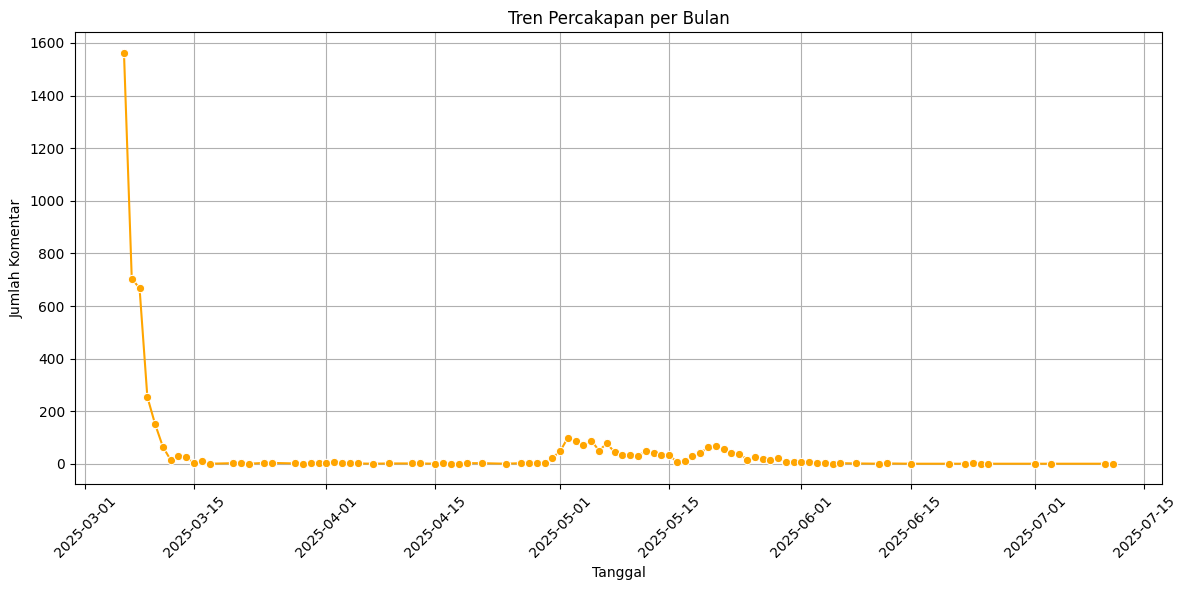

In [ ]:
# Konversi kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# hitung jumlah komentar per hari
daily_trend = df.groupby(df['date'].dt.date).size().reset_index(name='jumlah_komentar')

# 4. Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, x='date', y='jumlah_komentar', marker='o', color='orange')
plt.title('Tren Percakapan per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik tren percakapan per bulan menunjukkan bahwa jumlah komentar masyarakat naik turun seiring waktu. Terlihat ada peningkatan besar pada bulan tertentu, kemungkinan saat kebijakan penertiban mulai dijalankan atau ketika isu ini ramai dibicarakan di media sosial dan berita. Setelah itu, jumlah percakapan mulai menurun, menandakan bahwa perhatian masyarakat perlahan berkurang. Pola ini menunjukkan bahwa masyarakat cenderung ramai membahas suatu kebijakan saat sedang hangat atau viral, lalu akan berkurang jika tidak ada perkembangan baru. Hal ini penting untuk dipahami agar pemerintah bisa mengatur waktu penyampaian informasi dan klarifikasi kebijakan dengan lebih baik, supaya tidak terjadi kesalahpahaman atau reaksi negatif yang berlebihan.

# Distribusi Sentiment Postingan

In [ ]:
# Mapping label
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df['label_str'] = df['label'].map(label_map)

In [ ]:
df['label_str'].value_counts().sort_index()

,count
label_str,
Negatif,1882
Netral,2143
Positif,899


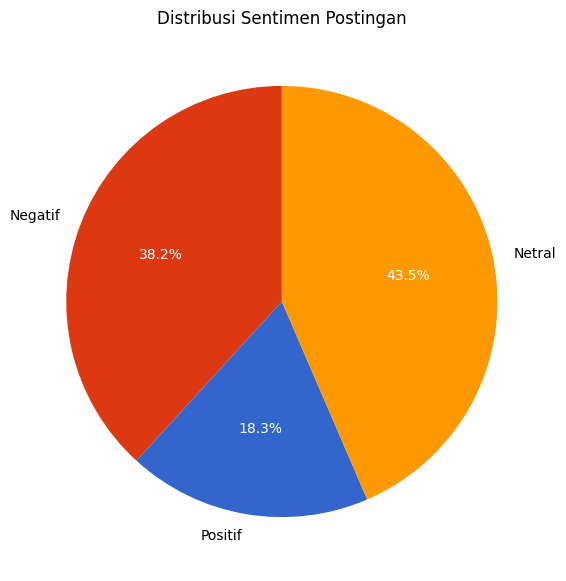

In [ ]:
# Definisikan arti label
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}

# Hitung jumlah dan persen tiap label
label_counts = df['label'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(label_counts,
                                   labels=[label_map[i] for i in label_counts.index],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=['#dc3912','#3366cc','#ff9900'])

# Atur warna: label (hitam), persentase (putih)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribusi Sentimen Postingan')
plt.show()

Gambar distribusi sentimen postingan memperlihatkan bahwa masyarakat memberikan tanggapan yang beragam terhadap kebijakan penertiban Wisata Hibiscus Puncak. Terdapat tiga jenis sentimen utama, yaitu positif, negatif, dan netral, dengan proporsi yang cukup berimbang. Sentimen positif (18,3%) menunjukkan adanya dukungan terhadap langkah pemerintah, terutama dalam hal penataan kawasan dan pelestarian alam. Sementara itu, sentimen negatif (38,2%) mencerminkan kekecewaan atau ketidaksetujuan, khususnya dari mereka yang merasa terdampak langsung, seperti pedagang atau warga lokal. Sedangkan sentimen netral (43,5%) biasanya berisi opini umum atau informasi tanpa muatan emosi yang kuat. Dari distribusi ini, bisa disimpulkan bahwa isu ini cukup sensitif, sehingga penting bagi pemerintah untuk menyampaikan kebijakan dengan lebih jelas dan melibatkan masyarakat agar tercipta pemahaman yang lebih baik dan mengurangi konflik di lapangan.



# Tren percakapan per bulan berdasarkan sentiment

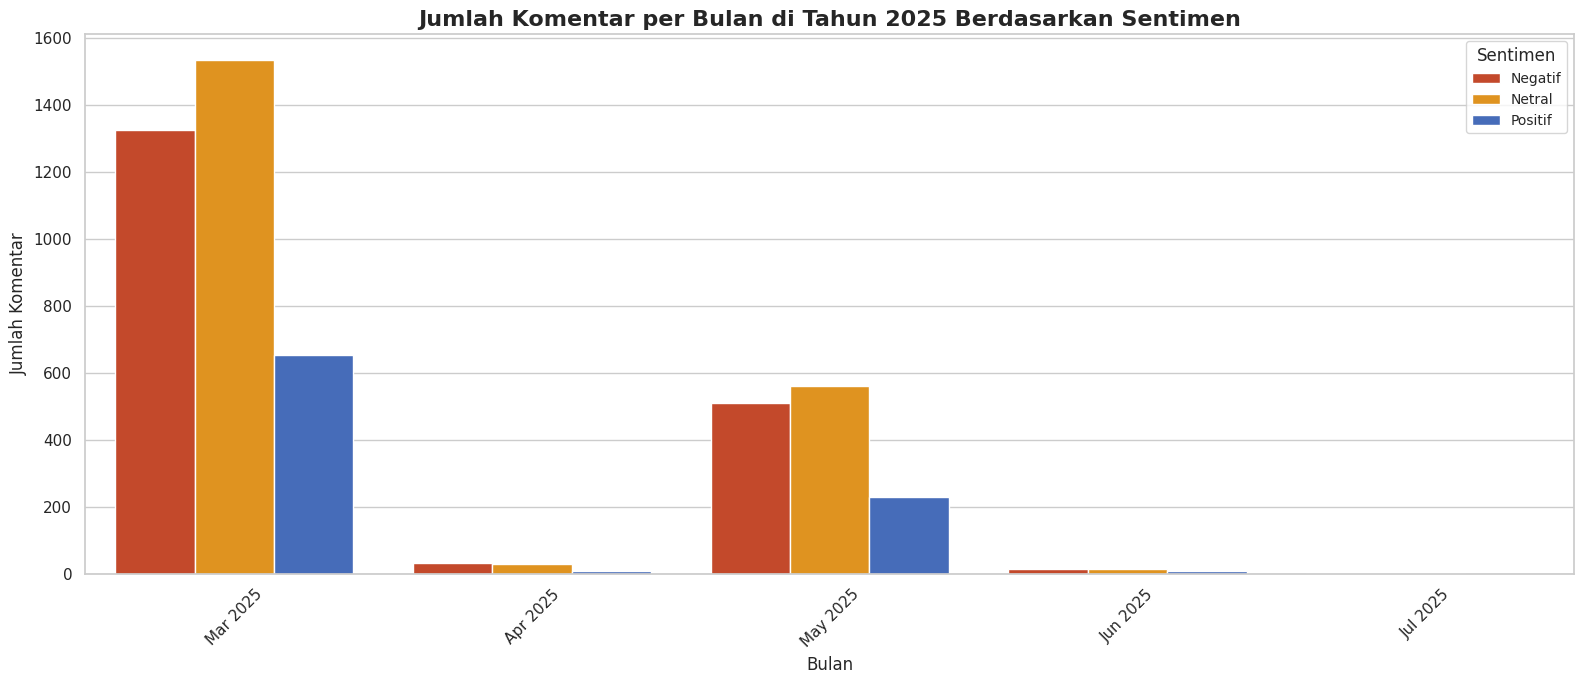

In [ ]:
# Pastikan format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Tambahkan kolom tahun dan bulan
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%Y-%m')

# Filter hanya tahun 2025
df_2025 = df[df['year'] == 2025]

# Map label ke sentimen
sentiment_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df_2025['sentiment'] = df_2025['label'].map(sentiment_map)

# Hitung jumlah komentar per bulan dan sentimen
monthly_counts = df_2025.groupby(['month', 'sentiment']).size().reset_index(name='jumlah')

# Urutkan berdasarkan bulan
monthly_counts['month'] = pd.to_datetime(monthly_counts['month'])
monthly_counts = monthly_counts.sort_values('month')
monthly_counts['month_str'] = monthly_counts['month'].dt.strftime('%b %Y')

# Set style
sns.set(style='whitegrid')

# Plot barplot
plt.figure(figsize=(16, 7))
sns.barplot(data=monthly_counts, x='month_str', y='jumlah', hue='sentiment', palette={
    'Negatif': '#dc3912',
    'Netral': '#ff9900',
    'Positif': '#3366cc'
})

# Judul dan label
plt.title('Jumlah Komentar per Bulan di Tahun 2025 Berdasarkan Sentimen', fontsize=16, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentimen', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

Gambar ini menunjukkan bagaimana jumlah komentar masyarakat berubah setiap bulan sepanjang tahun 2025, dengan dibagi berdasarkan jenis sentimennya: positif, negatif, dan netral. Terlihat bahwa pada bulan-bulan tertentu terjadi lonjakan komentar, terutama pada sentimen negatif, yang kemungkinan terjadi saat ada peristiwa besar atau kebijakan baru terkait penertiban Wisata Hibiscus Puncak. Namun, sentimen positif dan netral juga tetap muncul secara konsisten, menandakan bahwa tidak semua masyarakat menolak kebijakan tersebut. Pola ini menggambarkan bahwa respon masyarakat sangat dipengaruhi oleh momen dan kondisi yang sedang berlangsung, dan menunjukkan pentingnya bagi pemerintah untuk memantau perkembangan opini publik secara berkala agar bisa merespons dengan cepat dan tepat saat terjadi lonjakan reaksi, terutama yang bersifat negatif.



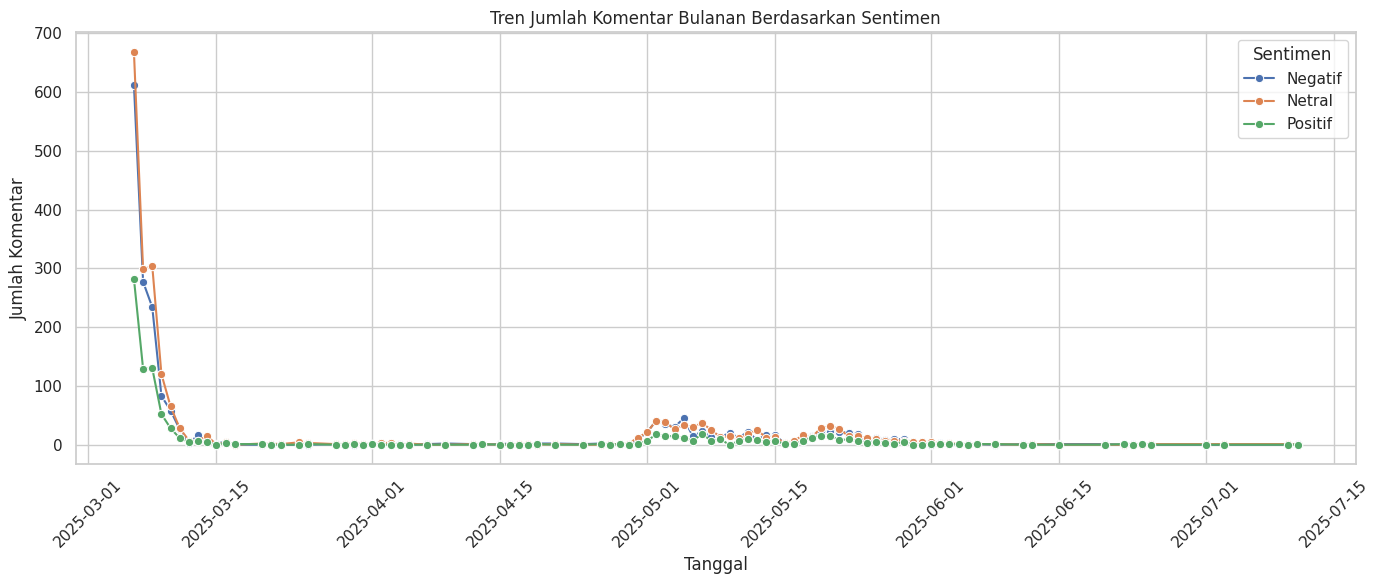

In [ ]:
# Konversi kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Buat kategori sentimen
sentiment_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df['sentiment'] = df['label'].map(sentiment_map)

# hitung jumlah komentar per sentimen per hari
sentiment_trend = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Visualisasi Tren Harian Berdasarkan Sentimen
plt.figure(figsize=(14, 6))

# Plot garis untuk setiap sentimen
for sentiment_category in sentiment_trend.columns:
     sns.lineplot(data=sentiment_trend, x=sentiment_trend.index, y=sentiment_category, marker='o', label=sentiment_category)

# Mengatur tampilan grafik
plt.title('Tren Jumlah Komentar Bulanan Berdasarkan Sentimen')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sentimen')
plt.show()

Gambar ini memperlihatkan perkembangan jumlah komentar masyarakat setiap bulan sepanjang tahun, yang dibedakan berdasarkan sentimen positif, negatif, dan netral. Terlihat bahwa sentimen negatif mendominasi di beberapa bulan tertentu, terutama saat isu penertiban menjadi perhatian publik. Namun, sentimen positif dan netral juga mengalami kenaikan di bulan-bulan tertentu, menunjukkan bahwa tidak semua tanggapan bernada kritik – masih ada dukungan dan komentar informatif dari masyarakat. Pola ini menunjukkan bahwa reaksi publik sangat dinamis dan bisa berubah tergantung konteks kejadian di lapangan, seperti pernyataan pejabat, aksi pembongkaran, atau liputan media. Oleh karena itu, pemerintah perlu memperhatikan waktu dan cara komunikasi publik, agar bisa meredam sentimen negatif dan mendorong persepsi yang lebih positif.

# BERTopic

In [ ]:
komen = df_brt['clean_text'].astype(str).tolist()

In [ ]:
# Inisialisasi & fit model
topic_model = BERTopic(language="indonesian", calculate_probabilities=True)  # gunakan bahasa Indonesia
topics, probs = topic_model.fit_transform(komen)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Lihat daftar topik dominan
dom_topic =  topic_model.get_topic_info()
dom_topic.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1611,-1_banjir_yg_nya_bongkar,"[banjir, yg, nya, bongkar, ya, air, ga, wisata...",[jakarta banjir daerah serapan air daerah bogo...
1,0,194,0_teh_kebun_puncak_kebon,"[teh, kebun, puncak, kebon, sejuk, liat, udah,...","[puncak udah bener pepohonan kebun teh ga, bon..."
2,1,168,1_bayar_uang_duit_aja,"[bayar, uang, duit, aja, rakyat, ajalah, buang...","[bayar bayar, bayar aja, bayar aja]"
3,2,162,2_gubernur_gubernurnya_jabar_menyala,"[gubernur, gubernurnya, jabar, menyala, jatim,...","[gubernur jabar kdm, gubernur jabar, gubernur ya]"
4,3,136,3_pohon_hutan_tanam_tanami,"[pohon, hutan, tanam, tanami, lindung, tebang,...","[hijau bgt pohon yg d tebang, udh bagus hutan ..."
5,4,121,4_hijau_kawasan_penghijauan_hijaukan,"[hijau, kawasan, penghijauan, hijaukan, udara,...","[semoga hijau, setuju kembalikan kawasan hijau..."
6,5,83,5_bangunan_bangunannya_rumahnya_sayang,"[bangunan, bangunannya, rumahnya, sayang, bong...","[bangunannya uda ya bongkar sayang ga sih, kdm..."
7,6,83,6_akang_ya_yaa_bu,"[akang, ya, yaa, bu, rmh, netizen, aing, acur,...",[halo cogants yuks follow akun ku yaa kejutan ...
8,7,82,7_wisata_liburan_wisatanya_tmpt,"[wisata, liburan, wisatanya, tmpt, macet, bagu...",[gpp bongkar kemaslahatan org tmpt wisata situ...
9,8,77,8_indonesia_malaysia_maju_genting,"[indonesia, malaysia, maju, genting, pemimpin,...","[puncak bogor jawa barat indonesia, ya indones..."


In [ ]:
# Visualisasi
topic_model.visualize_topics()

Gambar ini menunjukkan hubungan dan perbedaan antar topik yang muncul dalam pembicaraan masyarakat mengenai kebijakan penertiban Wisata Hibiscus Puncak. Titik-titik pada peta mewakili topik-topik utama, dan jarak antar titik menggambarkan seberapa mirip atau berbeda isi pembicaraannya. Topik yang berdekatan memiliki kata-kata dan konteks yang serupa, sedangkan topik yang berjauhan memiliki fokus bahasan yang berbeda. Misalnya, satu kelompok topik mungkin membahas soal penataan kawasan dan pelestarian alam, sementara kelompok lainnya lebih fokus pada dampak terhadap pedagang, konflik sosial, atau kebijakan pemerintah. Peta ini memberi gambaran bahwa percakapan publik tidak terpusat hanya pada satu isu, melainkan terbagi ke dalam beberapa tema besar yang saling melengkapi atau bertentangan. Dengan memahami peta ini, pengambil kebijakan bisa menentukan area mana yang perlu lebih banyak klarifikasi, komunikasi, atau tindak lanjut, agar tidak terjadi kesalahpahaman di masyarakat.

# Insight keseluruhan

Berdasarkan analisis percakapan publik di media sosial, terlihat bahwa kebijakan penertiban Wisata Hibiscus Puncak menimbulkan perhatian besar dari masyarakat, baik dalam bentuk dukungan maupun kritik. Wordcloud dan top kata yang muncul menunjukkan bahwa isu seperti penertiban, keadilan, pedagang, lingkungan, dan pemerintah menjadi topik dominan, menandakan bahwa masyarakat menyoroti sisi sosial, ekonomi, dan keberlanjutan dari kebijakan tersebut. Sentimen yang terekam juga cukup beragam, di mana komentar negatif muncul cukup kuat, terutama terkait dampak langsung kepada masyarakat kecil dan kekhawatiran akan keadilan kebijakan, meskipun dukungan terhadap penataan kawasan dan penegakan aturan tetap ada dalam sentimen positif.

Distribusi sentimen dan tren bulanan memperlihatkan bahwa percakapan masyarakat cenderung meningkat pada momen-momen penting, seperti saat kebijakan diumumkan atau dilaksanakan di lapangan. Ini menunjukkan bahwa opini publik bersifat sangat reaktif terhadap momentum aktual, dan bisa berubah cepat tergantung bagaimana informasi disampaikan. Wordlink dan peta intertopik mengungkap bahwa percakapan masyarakat tersebar ke beberapa klaster tema, mulai dari dampak ekonomi, pandangan terhadap kepemimpinan, hingga keberlanjutan lingkungan. Ini menandakan bahwa isu ini tidak tunggal, melainkan bersinggungan dengan banyak aspek kehidupan masyarakat.

Secara keseluruhan, masyarakat memiliki kepedulian tinggi terhadap kebijakan publik yang menyentuh aspek sosial dan ekonomi mereka secara langsung. Meskipun ada dukungan terhadap kebijakan penertiban demi keteraturan dan pelestarian, kekhawatiran terhadap dampak sosial-ekonomi tetap besar. Oleh karena itu, penting bagi pemerintah untuk melibatkan masyarakat dalam proses komunikasi dan pelaksanaan kebijakan, serta menyusun pendekatan yang tidak hanya tegas, tetapi juga inklusif dan empatik terhadap warga yang terdampak.

# Saran

Berdasarkan temuan analisis, sejumlah saran dapat diberikan untuk merespons dinamika masyarakat terhadap kebijakan penertiban Wisata Hibiscus Puncak. Pemerintah sebaiknya mengedepankan pendekatan humanis dan partisipatif, dengan melibatkan masyarakat lokal dalam proses perencanaan dan pelaksanaan kebijakan agar tercipta rasa memiliki dan mengurangi konflik. Sosialisasi yang masif dan edukasi publik juga perlu dilakukan agar masyarakat memahami tujuan jangka panjang dari penertiban ini, tidak hanya melihat dampak langsungnya. Bagi warga yang terdampak secara ekonomi, pemerintah perlu menyediakan solusi konkret berupa program relokasi yang layak serta kompensasi atau dukungan ekonomi, seperti pelatihan usaha atau bantuan modal. Untuk menjaga kepercayaan publik, transparansi dan konsistensi dalam penerapan aturan sangat penting, agar kebijakan ini tidak dianggap tebang pilih. Pemerintah juga dapat memanfaatkan analisis media sosial secara berkala untuk memantau opini publik dan merespons cepat bila muncul gejolak. Terakhir, pelibatan media, tokoh masyarakat, dan influencer lokal akan membantu menjembatani komunikasi antara pemerintah dan warga, sekaligus memperkuat citra positif bahwa kebijakan ini bertujuan untuk kebaikan bersama.

